In [1]:
'''
Created 01/05/2018

The goal of this project is to implement a simple Neural Network 
in Python using numpy.

Architecture of the NN : 
Tanh x 2 times + sigmoid for output
'''
import numpy as np
import matplotlib.pyplot as plt
import time

def ReLU(Z):
    '''
    Compute the ReLU of the matrix Z
    '''
    relu = np.maximum(0, Z)
    
    return relu

def Sigmoid(Z):
    '''
    Compute the sigmoid of the matrix Z
    '''
    sigmoid = 1/(1+np.exp(-Z))
    
    return sigmoid

def InitializeParameters(n_x, n_1, n_2, n_y):
    '''
    Initialize the parameters values W and b for each layers.
    --------
    Input  
            - n_x : number of features of X (input of the model)
            - n_1 : number of units in layer 1
            - n_2 : number of units in layer 2
            - n_y : number of features of Y (label for prediction)
    Output
            - parameters : dictionnary of the parameters W and b
                           for each layers
    '''
    parameters = {}
    
    parameters['W1'] = np.random.randn(n_1, n_x)*0.01
    parameters['b1'] = np.zeros((n_1, 1))
    parameters['W2'] = np.random.randn(n_2, n_1)*0.01
    parameters['b2'] = np.zeros((n_2, 1))
    parameters['W3'] = np.random.randn(n_y, n_2)*0.01
    parameters['b3'] = np.zeros((n_y, 1))
    
    return parameters

    
def ForwardProp(X, parameters):
    '''
    Compute the prediction matrix A3.
    --------
    Input
            - X : Matrix of input (n_x, m)
            - parameters : dictionnary of parameters W and b, for each layers
    Output
            - A3 : The prediction matrix (n_y, m)
            - cache : Dictionnary of the A and Z, to use them during backprop
    '''
    # get the parameters from the parameters dict
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # compute forward propagation
    # first layer
    Z1 = W1.dot(X) + b1
    A1 = np.tanh(Z1)
    # second layer
    Z2 = W2.dot(A1) + b2
    A2 = np.tanh(Z2)
    # last layer
    Z3 = W3.dot(A2) + b3
    A3 = Sigmoid(Z3)
    
    # get the Z and A in to the cache dictionnary
    cache = {}
    cache['Z1'] = Z1
    cache['A1'] = A1
    cache['Z2'] = Z2
    cache['A2'] = A2
    
    return A3, cache

def ComputeCost(Y, A3):
    '''
    Compute the cost function.
    --------
    Input
            - Y : Target matrix (n_y, m)
            - A3 : Prediction matrix (n_y, m)
    Output
            - cost : the cost function computed for Y and A3
    '''
    # compute the loss matrix 
    loss = - Y * np.log(A3) - (1-Y) * np.log(1 - A3)
    # sum the loss through the m examples
    cost = np.average(loss)
    
    return cost


def BackProp(X, Y, A3, parameters, cache):
    '''
    Compute the gradients of the cost for the parameters W, b of each layers
    --------
    Input
            - X :
            - Y :
            - A3 :
            - parameters : 
            - cache :
    Output
            - grads : dictionnary of the derivatives of the cost function
                      for each parameters
    '''
    # m = number of training examples
    m = X.shape[1]
    
    # get the A and Z from cache
    Z1 = cache['Z1']
    A1 = cache['A1']
    Z2 = cache['Z2']
    A2 = cache['A2']
    
    # get the W parameters
    W3 = parameters['W3']
    W2 = parameters['W2']
    
    # last layer
    dZ3 = A3 - Y
    dW3 = (1/m) * dZ3.dot(A2.T)
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    # second layer
    dA2 = W3.T.dot(dZ3)
    dZ2 = (1 - np.tanh(Z2)**2) * dA2
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    # first layer
    dA1 = W2.T.dot(dZ2)
    dZ1 = (1 - np.tanh(Z1)**2) * dA1
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {}
    grads['dW1'] = dW1
    grads['db1'] = db1
    grads['dW2'] = dW2
    grads['db2'] = db2
    grads['dW3'] = dW3
    grads['db3'] = db3
    
    return grads

def UpdateParameters(parameters, grads, learning_rate):
    '''
    Update the parameters by gradient descent
    ---------
    Input
            - parameters : dictionnary of parameters W, b of each layer
            - grads : dictionnary of gradient of the cost function
                      for each parameters W, b of each leayer
            - learning_rate : learning rate to use for updating the parameters
    Output
            - parameters : parameters updated after gradient descent
    '''
    # get parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # get gradients
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW3 = grads['dW3']
    db3 = grads['db3']
    
    # update the parameters    
    parameters['W1'] = W1 - learning_rate * dW1
    parameters['b1'] = b1 - learning_rate * db1
    parameters['W2'] = W2 - learning_rate * dW2
    parameters['b2'] = b2 - learning_rate * db2
    parameters['W3'] = W3 - learning_rate * dW3
    parameters['b3'] = b3 - learning_rate * db3
    
    return parameters

def NN_model(X, Y, n_1, n_2, epoch=10000, learning_rate=0.01, verbose=True):
    '''
    Train a Neural Network of 3 layers (2 hidden layers Tanh and sigmoid for the output).
    ----------
    Input
            - X : input training dataset (m, n_x)
            - Y : target of the training dataset (m, 1)
            - layer_units : tuple of number of units for the 2 ReLU layers
            - epoch : number of iteration
            - learning_rate : learning rate for the gradient descent
            - verbose : if True, print cost function value every 100 epoch
    Output
            - parameters : dictionnary of the trained parameters W, b for each layers
    '''
    t0 = time.time()
    # transpose X and Y
    X = X.T
    Y = Y.T
    
    # get the number of features n_x and number of examples m of X
    n_x, m = X.shape
    
    # initialize the parameters
    parameters = InitializeParameters(n_x, n_1, n_2, 1)
    
    # initialize a list to plot the evolution of the cost function
    cost_list = []
    for i in range(epoch):
        # compute the forward propagation
        A3, cache = ForwardProp(X, parameters)
        
        # compute the back propagation
        grads = BackProp(X, Y, A3, parameters, cache)
        
        # update the parameters
        parameters = UpdateParameters(parameters, grads, learning_rate)
        
        if  i%10 == 0:
            # compute the cost function
            cost = ComputeCost(Y, A3)
            cost_list.append(cost)
            
            if verbose and (i%1000 == 0):
                print('Cost function after epoch {} : {}'.format(i, cost))
    
    print('Cost function after epoch {} : {}'.format(epoch, cost))
    print('Time : %.3f s' % (time.time()-t0))
    
    # print the cost function for each iterations
    plt.plot(cost_list)
    plt.title('Cost function')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost Function')
    
    return parameters, cost_list

def MakePrediction(X, parameters):
    '''
    Make prediction of the data X
    ---------
    Input
            - X : Input data (m, n_x)
            - parameters : parameters W, b of each layers of the NN model
    Output
            - Y_pred : Predicted labels for X (m, n_y)
    '''
    X = X.T
    A3, _ = ForwardProp(X, parameters)
    Y_pred = (A3 > 0.5)*1
    Y_pred = Y_pred.T # transpose the prediction to get the usual form (m, n_y)
    
    return Y_pred 

def GetAccuracy(Y, Y_pred):
    '''
    Compute the accuracy
    --------
    Input
            - Y : Target labels (m, n_y)
            - Y_pred : Predicted labels (m, n_y)
    Output
            - accuracy : accuracy value
    '''
    accuracy = np.average(Y == Y_pred)
    
    return accuracy

# Test on digits

Test of the NN on the digits dataset from scikit-learn. We'll try to predict if the picture is **1**.

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

digits = load_digits()

X = digits['data']/16 # normalize the values between 0 and 1
Y = digits['target']
Y = (Y == 1)*1  # target value =1 for digit 1, and 0 for all other digits

Y = Y.reshape(-1, 1)
print('X shape :', X.shape)
print('Y shape :', Y.shape)

X shape : (1797, 64)
Y shape : (1797, 1)


### Plot a digit

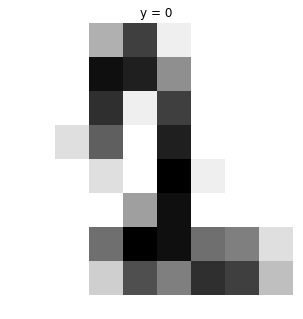

In [3]:
%matplotlib inline

index = 12
digit = X[index].reshape(8,8)
target = Y[index].squeeze()

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ax.imshow(digit, cmap='gray_r')
ax.set_title('y = {}'.format(target))
ax.axis('off');

### Split the data into train and test set

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Train the model to predict images of **1**

Cost function after epoch 0 : 0.6931467373746464
Cost function after epoch 1000 : 0.3403216870700217
Cost function after epoch 2000 : 0.060395094758117204
Cost function after epoch 3000 : 0.031245351440609
Cost function after epoch 4000 : 0.02146101578023537
Cost function after epoch 5000 : 0.016894356153856288
Time : 7.218 s


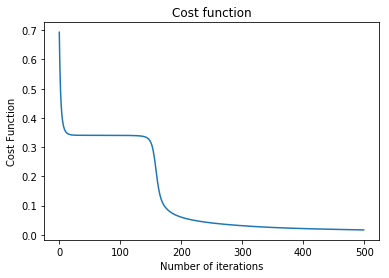

In [5]:
n_1, n_2 = 20, 10

parameters, cost_list = NN_model(X_train, Y_train, n_1, n_2, epoch=5000, learning_rate=0.1, verbose=True)

### Train set accuracy

In [6]:
Y_train_pred = MakePrediction(X_train, parameters)
accuracy = GetAccuracy(Y_train, Y_train_pred)

print('train set accuracy :', accuracy)
print(classification_report(Y_train, Y_train_pred))

train set accuracy : 0.99652052888
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1283
          1       0.99      0.98      0.98       154

avg / total       1.00      1.00      1.00      1437



### Test set accuracy

In [7]:
Y_test_pred = MakePrediction(X_test, parameters)
accuracy = GetAccuracy(Y_test, Y_test_pred)

print('test set accuracy :', accuracy)
print(classification_report(Y_test, Y_test_pred))

test set accuracy : 0.986111111111
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       332
          1       0.85      1.00      0.92        28

avg / total       0.99      0.99      0.99       360



### Conclusion

Very good performance on this small dataset !
Next : implement a softmax classifier for the output, to predict every digits possible.